In [110]:
# Importing of general libraries
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import sklearn as sk
import seaborn as sns
%matplotlib inline 

# Image libraries
from PIL import Image
import cv2

# Importing tsorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, BatchNormalization
from keras import regularizers


In [111]:
# Set the image size
img_width, img_height = 72, 72

# Define the number of classes
num_classes = 4

# Define the batch size
batch_size = 16

# Define the number of epochs
epochs = 100

# Define the input shape
input_shape = (72, 72, 3)

# Define the number of classes
num_classes = 4

# Define the list of class names
class_names = ["え","お","み","そ"]

hello /home/celoy001/ETL_CNN/CNN/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc


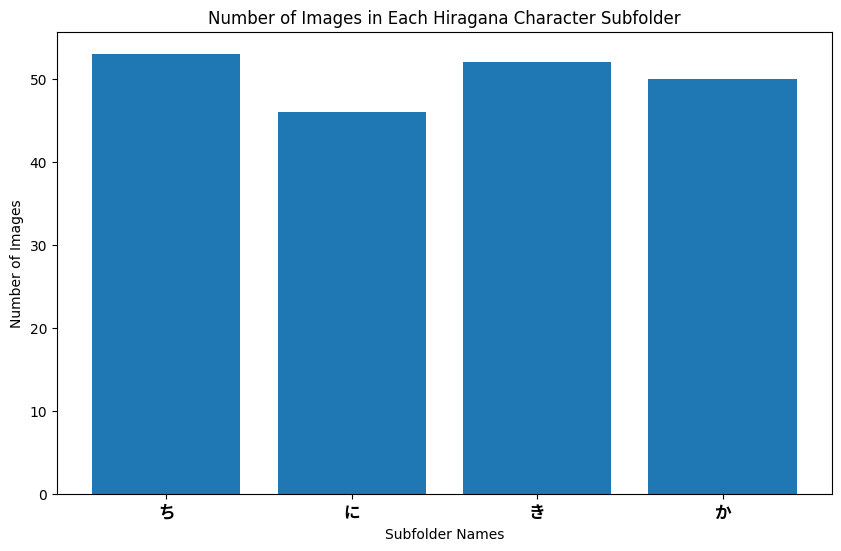

In [112]:
fprop = fm.FontProperties(fname='NotoSansJP-Bold.ttf')
print("hello", matplotlib.matplotlib_fname())

# Set the path to the parent folder containing the subfolders with images
parent_folder = "Dataset/Hiragana/model4/train"

# Create a list to store the number of images in each subfolder
image_counts = []

# Loop through each subfolder
for folder_name in os.listdir(parent_folder):
    folder_path = os.path.join(parent_folder, folder_name)
    
    # Check if the subfolder is actually a folder (not a file)
    if os.path.isdir(folder_path):
        # Count the number of files in the subfolder and append to image_counts list
        count = len(os.listdir(folder_path))
        image_counts.append(count)


# Create the countplot with subfolder names as labels
plt.figure(figsize=(10,6))
plt.title("Number of Images in Each Hiragana Character Subfolder")
plt.xlabel("Subfolder Names")
plt.ylabel("Number of Images")
plt.xticks(rotation=0, fontproperties=fprop ,fontsize=12)
plt.bar(os.listdir(parent_folder), image_counts)
plt.show()

hello /home/celoy001/ETL_CNN/CNN/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc


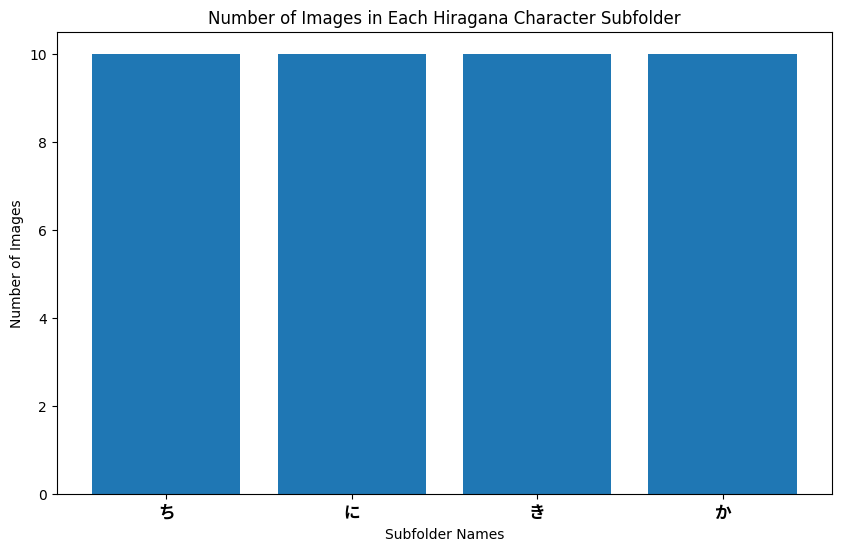

In [113]:
fprop = fm.FontProperties(fname='NotoSansJP-Bold.ttf')
print("hello", matplotlib.matplotlib_fname())

# Set the path to the parent folder containing the subfolders with images
parent_folder = "Dataset/Hiragana/model4/test"

# Create a list to store the number of images in each subfolder
image_counts = []

# Loop through each subfolder
for folder_name in os.listdir(parent_folder):
    folder_path = os.path.join(parent_folder, folder_name)
    
    # Check if the subfolder is actually a folder (not a file)
    if os.path.isdir(folder_path):
        # Count the number of files in the subfolder and append to image_counts list
        count = len(os.listdir(folder_path))
        image_counts.append(count)


# Create the countplot with subfolder names as labels
plt.figure(figsize=(10,6))
plt.title("Number of Images in Each Hiragana Character Subfolder")
plt.xlabel("Subfolder Names")
plt.ylabel("Number of Images")
plt.xticks(rotation=0, fontproperties=fprop ,fontsize=12)
plt.bar(os.listdir(parent_folder), image_counts)
plt.show()

In [114]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.2, 
    fill_mode='nearest',
    validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dataset = train_datagen.flow_from_directory(
    'Dataset/Hiragana/model4/train',
    target_size=(72, 72),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    shuffle=True)

val_dataset = train_datagen.flow_from_directory(
    'Dataset/Hiragana/model4/train',
    target_size=(72, 72),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    shuffle=False)

test_dataset = test_datagen.flow_from_directory(
    'Dataset/Hiragana/model4/test',
    target_size=(72, 72),
    batch_size=16,
    class_mode='categorical',
    shuffle= False)


Found 162 images belonging to 4 classes.
Found 39 images belonging to 4 classes.
Found 40 images belonging to 4 classes.


In [115]:
from sklearn.utils.class_weight import compute_class_weight
# calculate the class weights
class_weights = compute_class_weight(class_weight='balanced',
                                      classes=np.unique(train_dataset.classes),
                                      y=train_dataset.classes)
# convert to dictionary
class_weights_dict = dict(enumerate(class_weights))

print(class_weights)

[1.0125     0.96428571 0.94186047 1.09459459]


In [116]:
class_indices = train_dataset.class_indices
print(class_indices)

{'か': 0, 'き': 1, 'ち': 2, 'に': 3}


In [117]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_width, img_height, 3)),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.1),
    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.1),
    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.1),
    Dense(num_classes, activation='softmax')
])

from keras.optimizers import Adam
# Compile the model
opt = Adam(learning_rate=0.00005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Print the summary of the model
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 70, 70, 32)        896       
                                                                 
 batch_normalization_24 (Bat  (None, 70, 70, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 35, 35, 32)       0         
 g2D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 35, 35, 32)        0         
                                                                 
 conv2d_25 (Conv2D)          (None, 33, 33, 64)        18496     
                                                                 
 batch_normalization_25 (Bat  (None, 33, 33, 64)      

In [118]:
batch = next(train_dataset)
print(batch[0].shape) # prints the dimensions of the input data in the batch
print(batch[1].shape)

(16, 72, 72, 3)
(16, 4)


In [119]:
# Train the model
history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=300, class_weight=class_weights_dict)



Epoch 1/300


2023-04-19 15:22:18.705629: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


11/11 [==============================] - ETA: 0s - loss: 2.0688 - accuracy: 0.2407

2023-04-19 15:22:19.995087: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


11/11 [==============================] - 1s 89ms/step - loss: 2.0688 - accuracy: 0.2407 - val_loss: 1.3958 - val_accuracy: 0.2564
Epoch 2/300
11/11 [==============================] - 1s 69ms/step - loss: 1.5776 - accuracy: 0.2901 - val_loss: 1.3779 - val_accuracy: 0.3590
Epoch 3/300
11/11 [==============================] - 1s 73ms/step - loss: 1.7094 - accuracy: 0.2963 - val_loss: 1.3860 - val_accuracy: 0.2564
Epoch 4/300
11/11 [==============================] - 1s 67ms/step - loss: 1.4140 - accuracy: 0.4012 - val_loss: 1.4051 - val_accuracy: 0.2564
Epoch 5/300
11/11 [==============================] - 1s 67ms/step - loss: 1.3949 - accuracy: 0.4074 - val_loss: 1.4101 - val_accuracy: 0.2564
Epoch 6/300
11/11 [==============================] - 1s 62ms/step - loss: 1.3562 - accuracy: 0.3889 - val_loss: 1.4563 - val_accuracy: 0.2564
Epoch 7/300
11/11 [==============================] - 1s 76ms/step - loss: 1.3275 - accuracy: 0.4259 - val_loss: 1.4794 - val_accuracy: 0.2564
Epoch 8/300
11/11 

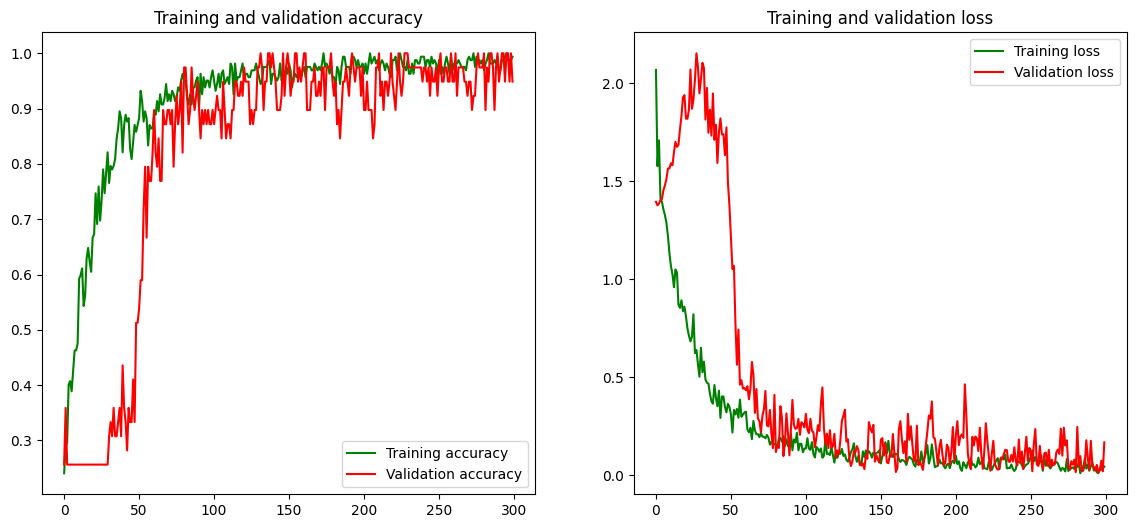

In [120]:
def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = range(len(acc))
    f, ax = plt.subplots(1,2, figsize=(14,6))
    ax[0].plot(epochs, acc, 'g', label='Training accuracy')
    ax[0].plot(epochs, val_acc, 'r', label='Validation accuracy')
    ax[0].set_title('Training and validation accuracy')
    ax[0].legend()
    ax[1].plot(epochs, loss, 'g', label='Training loss')
    ax[1].plot(epochs, val_loss, 'r', label='Validation loss')
    ax[1].set_title('Training and validation loss')
    ax[1].legend()
    plt.show()
plot_accuracy_and_loss(history)

In [121]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_dataset)
print('Test accuracy:', test_acc)

3/3 [==============================] - 0s 10ms/step - loss: 0.0922 - accuracy: 0.9750
Test accuracy: 0.9750000238418579


2023-04-19 15:26:07.231039: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


2023-04-19 15:26:07.342971: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


3/3 [==============================] - 0s 9ms/step
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3
 3 3 3]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3
 3 3 3]


/home/celoy001/ETL_CNN/CNN/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: Glyph 12360 (\N{HIRAGANA LETTER E}) missing from current font.
  fig.canvas.draw()
/home/celoy001/ETL_CNN/CNN/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: Glyph 12362 (\N{HIRAGANA LETTER O}) missing from current font.
  fig.canvas.draw()
/home/celoy001/ETL_CNN/CNN/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: Glyph 12415 (\N{HIRAGANA LETTER MI}) missing from current font.
  fig.canvas.draw()
/home/celoy001/ETL_CNN/CNN/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: Glyph 12381 (\N{HIRAGANA LETTER SO}) missing from current font.
  fig.canvas.draw()
/home/celoy001/ETL_CNN/CNN/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 12360 (\N{HIRAGANA LETTER E}) missing from current font.
  func(*args, **kwargs)
/home/celoy001/ETL_CNN/CNN/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 12362 (\N{HIRAGANA LETTER O

              precision    recall  f1-score   support

           え       1.00      1.00      1.00        10
           お       1.00      0.90      0.95        10
           み       0.91      1.00      0.95        10
           そ       1.00      1.00      1.00        10

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40



/home/celoy001/ETL_CNN/CNN/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12360 (\N{HIRAGANA LETTER E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/celoy001/ETL_CNN/CNN/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12362 (\N{HIRAGANA LETTER O}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/celoy001/ETL_CNN/CNN/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12415 (\N{HIRAGANA LETTER MI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/celoy001/ETL_CNN/CNN/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12381 (\N{HIRAGANA LETTER SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


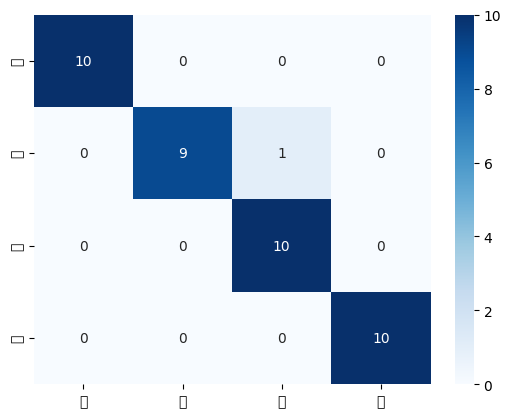

In [122]:
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Get the predicted labels
y_pred = model.predict(test_dataset)
y_pred = np.argmax(y_pred, axis=1)

# Get the true labels of the test dataset
y_true = test_dataset.classes
print(y_pred)
print(y_true)

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_names, yticklabels=class_names)

# Print the classification report
print(classification_report(y_true, y_pred, target_names=class_names))


In [123]:
model.save("hiraganamodel4.h5")